In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import yfinance as yf

df = yf.download("TSLA", start="2022-01-01", end="2024-12-31")
df.to_csv("tsla.csv")
df.head()

/tmp/ipykernel_6841/640370960.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download("TSLA", start="2022-01-01", end="2024-12-31")
[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,TSLA,TSLA,TSLA,TSLA,TSLA
Date,,,,,
2022-01-03,399.926666,400.356659,378.679993,382.583344,103931400
2022-01-04,383.196655,402.666656,374.350006,396.516663,100248300
2022-01-05,362.706665,390.113342,360.336670,382.216675,80119800
2022-01-06,354.899994,362.666656,340.166656,359.000000,90336600
2022-01-07,342.320007,360.309998,336.666656,360.123322,84164700


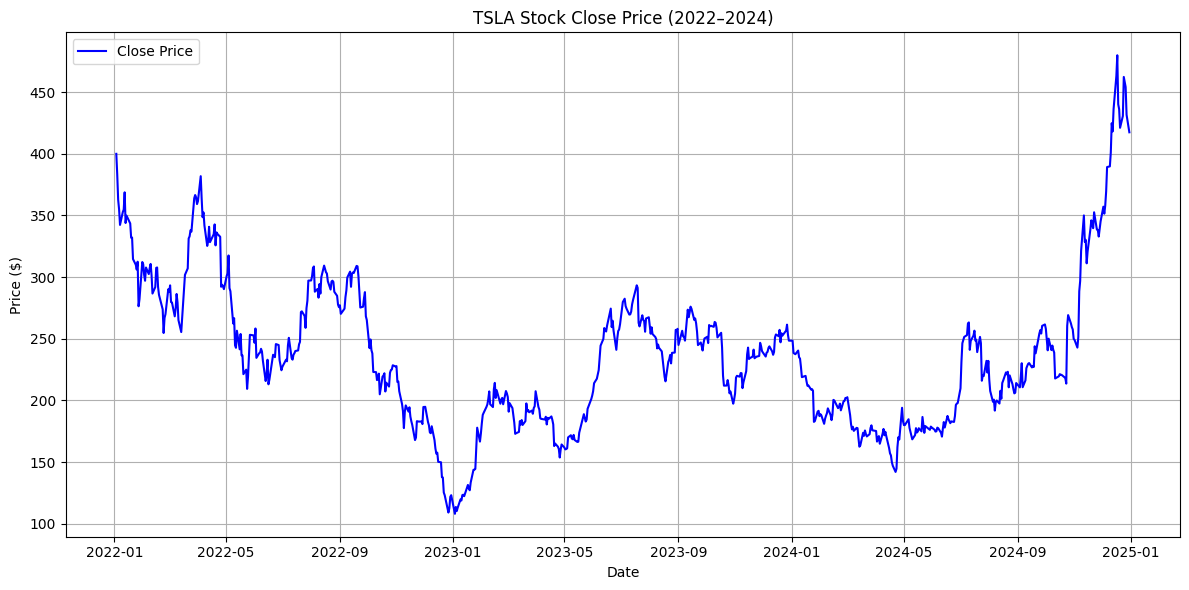

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# Plot only Close price
plt.figure(figsize=(12, 6))
plt.plot(df["Close"], label="Close Price", color="blue")
plt.title("TSLA Stock Close Price (2022–2024)")
plt.xlabel("Date")
plt.ylabel("Price ($)")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


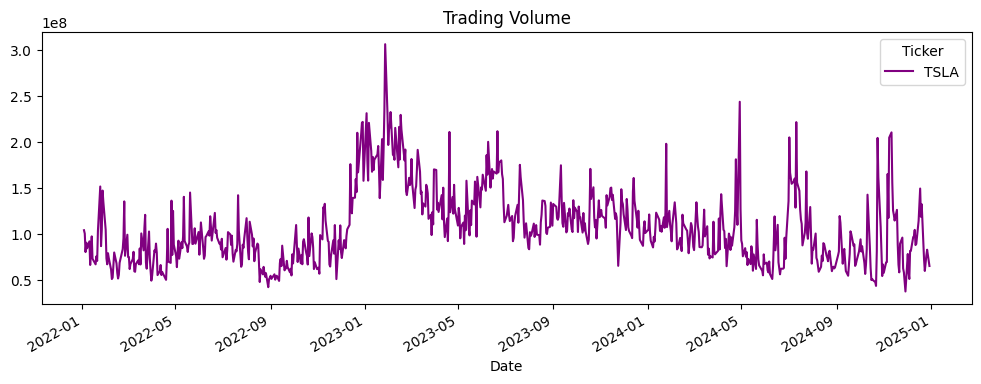

In [5]:
df["Volume"].plot(figsize=(12, 4), title="Trading Volume", color="purple")
plt.show()

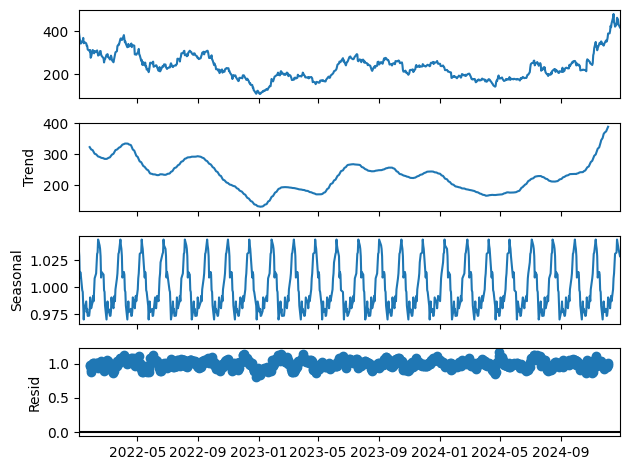

In [6]:
from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(df["Close"], model='multiplicative', period=30)
result.plot()
plt.show()

In [7]:
from statsmodels.tsa.stattools import adfuller

adf_result = adfuller(df["Close"])
print("ADF Statistic:", adf_result[0])
print("p-value:", adf_result[1])

ADF Statistic: -2.163360311901451
p-value: 0.2198111817302708


In [8]:
df.head()

Price,Close,High,Low,Open,Volume
Ticker,TSLA,TSLA,TSLA,TSLA,TSLA
Date,,,,,
2022-01-03,399.926666,400.356659,378.679993,382.583344,103931400
2022-01-04,383.196655,402.666656,374.350006,396.516663,100248300
2022-01-05,362.706665,390.113342,360.336670,382.216675,80119800
2022-01-06,354.899994,362.666656,340.166656,359.000000,90336600
2022-01-07,342.320007,360.309998,336.666656,360.123322,84164700


In [9]:
df['close_diff'] = df['Close'].diff().fillna(0)

In [10]:
result = adfuller(df["close_diff"].dropna())
print("ADF Statistic:", result[0])
print("p-value:", result[1])


ADF Statistic: -7.513413720929053
p-value: 3.960484780473965e-11


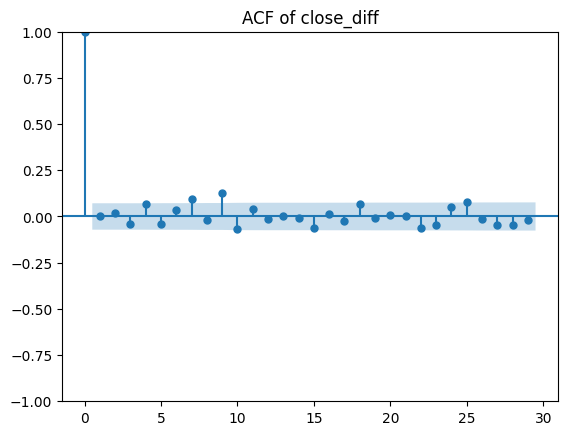

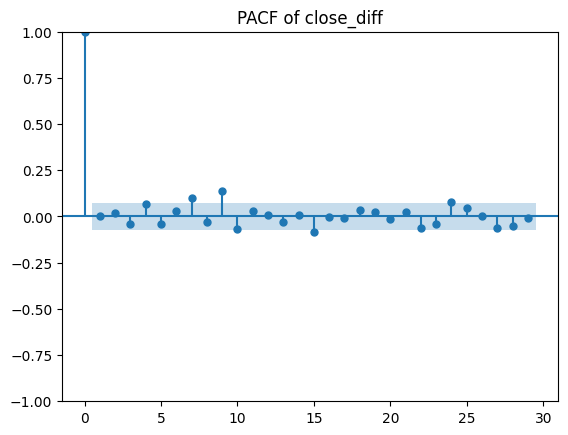

In [13]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt

plot_acf(df['close_diff'])
plt.title('ACF of close_diff')
plt.show()

plot_pacf(df['close_diff'])
plt.title('PACF of close_diff')
plt.show()


In [14]:
df.shape

(752, 6)

In [15]:
df.head()

Price,Close,High,Low,Open,Volume,close_diff
Ticker,TSLA,TSLA,TSLA,TSLA,TSLA,
Date,,,,,,
2022-01-03,399.926666,400.356659,378.679993,382.583344,103931400,0.000000
2022-01-04,383.196655,402.666656,374.350006,396.516663,100248300,-16.730011
2022-01-05,362.706665,390.113342,360.336670,382.216675,80119800,-20.489990
2022-01-06,354.899994,362.666656,340.166656,359.000000,90336600,-7.806671
2022-01-07,342.320007,360.309998,336.666656,360.123322,84164700,-12.579987


In [16]:
df.tail()

Price,Close,High,Low,Open,Volume,close_diff
Ticker,TSLA,TSLA,TSLA,TSLA,TSLA,
Date,,,,,,
2024-12-23,430.600006,434.510010,415.410004,431.000000,72698100,9.540009
2024-12-24,462.279999,462.779999,435.140015,435.899994,59551800,31.679993
2024-12-26,454.130005,465.329987,451.019989,465.160004,76366400,-8.149994
2024-12-27,431.660004,450.000000,426.500000,449.519989,82666800,-22.470001
2024-12-30,417.410004,427.000000,415.750000,419.399994,64941000,-14.250000


In [17]:
df.index

DatetimeIndex(['2022-01-03', '2022-01-04', '2022-01-05', '2022-01-06',
               '2022-01-07', '2022-01-10', '2022-01-11', '2022-01-12',
               '2022-01-13', '2022-01-14',
               ...
               '2024-12-16', '2024-12-17', '2024-12-18', '2024-12-19',
               '2024-12-20', '2024-12-23', '2024-12-24', '2024-12-26',
               '2024-12-27', '2024-12-30'],
              dtype='datetime64[ns]', name='Date', length=752, freq=None)

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from pmdarima.arima import auto_arima
from datetime import timedelta

# Assume df is your DataFrame and already contains 'close' column
# Ensure 'close_diff' exists for PACF
df['close_diff'] = df['close'].diff()
df['close_diff'].fillna(0, inplace=True)

# --- 1. Plot PACF ---
plt.figure(figsize=(10, 4))
plot_pacf(df['close_diff'], lags=30, method='ywm')
plt.title('PACF of close_diff')
plt.show()

# --- 2. Auto ARIMA ---
stepwise_model = auto_arima(df['close'], start_p=0, start_q=0,
                            max_p=5, max_q=5, m=1,
                            start_P=0, seasonal=False,
                            d=1, D=0, trace=True,
                            error_action='ignore',  
                            suppress_warnings=True, 
                            stepwise=True)

print(stepwise_model.summary())

# --- 3. Fit ARIMA Model ---
model = ARIMA(df['close'], order=stepwise_model.order)
model_fit = model.fit()

# --- 4. Forecast next N steps ---
n_forecast = 30
forecast = model_fit.forecast(steps=n_forecast)

# --- 5. Create date range for forecast ---
last_date = df.index[-1]
forecast_index = [last_date + timedelta(days=i+1) for i in range(n_forecast)]

# --- 6. Plot ---
plt.figure(figsize=(12, 6))
plt.plot(df['close'], label='Historical')
plt.plot(forecast_index, forecast, label='Forecast', linestyle='--')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('ARIMA Forecast')
plt.legend()
plt.grid(True)
plt.show()


ValueError: numpy.dtype size changed, may indicate binary incompatibility. Expected 96 from C header, got 88 from PyObject